In [17]:
import pandas as pd

### Pandas: merging by closest date example

In [18]:
left = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5], 
    "date":[
        "06/22/2014",
        "07/02/2014",
        "01/01/2015",
        "01/01/1991",
        "08/02/1999"
    ]})

right = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5, 6, 7], 
    "date":[
        "02/15/2015",
        "06/30/2014",
        "07/02/1999",
        "10/05/1990",
        "06/24/2014",
        "12/12/2222",
        "12/13/2222"
    ], "value": [333, 222, 444, 777, 42, 0, 0] 
})

left['date']  = pd.to_datetime(left.date)
right['date'] = pd.to_datetime(right.date)
left.sort_values('date', inplace=True)
right.sort_values('date', inplace=True)

In [19]:
left, right

(   ID       date
 3   4 1991-01-01
 4   5 1999-08-02
 0   1 2014-06-22
 1   2 2014-07-02
 2   3 2015-01-01,
    ID       date  value
 3   4 1990-10-05    777
 2   3 1999-07-02    444
 4   5 2014-06-24     42
 1   2 2014-06-30    222
 0   1 2015-02-15    333
 5   6 2222-12-12      0
 6   7 2222-12-13      0)

In [20]:
right1 = right.set_index('date').reindex(left.set_index('date').index, method='nearest').reset_index()

pd.merge(left, right1, on='date', suffixes=('_a', '_b'))

,ID_a,date,ID_b,value
0,4,1991-01-01,4,777
1,5,1999-08-02,3,444
2,1,2014-06-22,5,42
3,2,2014-07-02,2,222
4,3,2015-01-01,1,333


### Merging Engine data by closest time

In [21]:
egtm = pd.read_csv('./EGTM.csv', parse_dates=['RECORDED_DT'])

In [22]:
egtm_cols = egtm.columns[:5]
egtm = egtm[egtm_cols]
egtm = egtm[egtm['AIRCRAFT'] == 'VQ-BDQ']
egtm = egtm[egtm['POSITION'] == 1]
egtm['reportts'] = pd.to_datetime(egtm['RECORDED_DT'], format='mixed')
egtm['egtm_reportts'] = egtm['reportts']

In [23]:
neo = pd.read_csv(
    './a320_a321_neo_full_acms_parameters.csv', 
    parse_dates=['reportts', 'processedts'], 
)
neo = neo[neo['acnum'] == 'VQ-BDQ']
neo = neo[neo['pos'] == 1]

/tmp/ipykernel_46524/3501257036.py:1: DtypeWarning: Columns (152,154,172,173,176,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  neo = pd.read_csv(


ACMS = Aircraft Condition Monitoring System

In [24]:
neo.head()

,acnum,reportname,reportts,file_path,pos,fltdes,dep,arr,pf,wai,...,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14,processedts
0,VQ-BDQ,A320 ENG GAS PATH ADVISORY REPORT,2018-05-17 09:29:45,ecm/S7_NEO_320/VQ-BDQ/VQ-BDQ18052018135429R/_V...,1,9993,LFBO,UUDD,0.09,0.0,...,NaN,0.0,0.0,0.1,83.9,NaN,27.1,0.099,242.0,2023-09-25 10:17:19.928
2,VQ-BDQ,A320 ENG GAS PATH ADVISORY REPORT,2018-05-17 09:31:48,ecm/S7_NEO_320/VQ-BDQ/VQ-BDQ18052018135429R/_V...,1,9993,LFBO,UUDD,0.54,0.0,...,NaN,0.0,0.0,0.1,79.2,NaN,27.5,0.114,244.0,2023-09-25 10:17:20.128
4,VQ-BDQ,A320 ENGINE CRUISE REPORT,2018-05-17 12:42:09,ecm/S7_NEO_320/VQ-BDQ/VQ-BDQ18052018135429R/_V...,1,9993,LFBO,UUDD,0.48,0.0,...,NaN,NaN,NaN,NaN,39.1,39.1,NaN,0.765,562.0,2023-09-25 10:17:19.614
6,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2018-05-17 13:41:56,ecm/S7_NEO_320/VQ-BDQ/VQ-BDQ18052018135452R/_V...,1,9993,LFBO,UUDD,0.48,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,24.5,0.275,NaN,2023-09-25 10:17:20.409
8,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2018-05-17 13:42:10,ecm/S7_NEO_320/VQ-BDQ/VQ-BDQ18052018135452R/_V...,1,9993,LFBO,UUDD,0.48,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,25.2,0.596,NaN,2023-09-25 10:17:20.544


#### Data frequency by time:

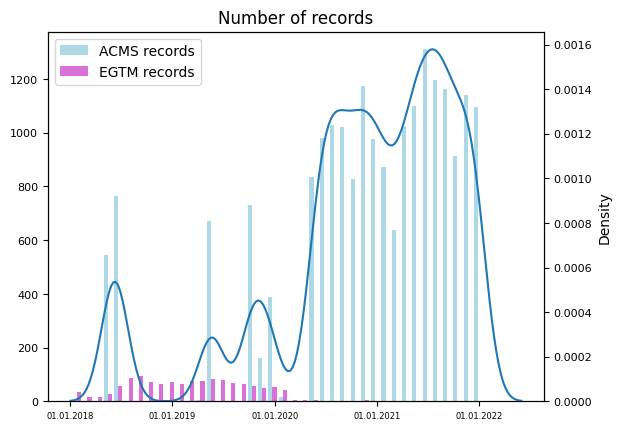

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

neo_report_timepoints = neo[neo['reportts'].dt.year < 2023 ]['reportts']
neo_report_timepoints = mdates.date2num(neo_report_timepoints)

plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=8)

fig, ax = plt.subplots()

ax2 = ax.twinx()

egtm_report_timepoints = egtm[egtm['reportts'].dt.year < 2023]['reportts']
egtm_report_timepoints = mdates.date2num(egtm_report_timepoints)

ax.hist([neo_report_timepoints, egtm_report_timepoints], bins=40, color=('lightblue', 'orchid'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

sns.kdeplot(neo_report_timepoints, ax=ax2);
plt.title("Number of records")

ax.legend(['ACMS records', 'EGTM records'])

plt.show()



#### Merging with EGTM table by closest recorded date (using indexes)

In [ ]:
neo.sort_values('reportts', inplace=True)
egtm.sort_values('reportts', inplace=True)

neo = neo.set_index('reportts')
egtm = egtm.set_index('reportts')

In [ ]:
egtm1 = egtm.reindex(neo.index, method='nearest').reset_index()

In [ ]:
merged = pd.merge(neo, egtm1, on='reportts')
merged.count()

reportts         20997
acnum            20997
reportname       20997
file_path        20997
pos              20997
                 ...  
POSITION         20997
ESN              20997
RECORDED_DT      20997
RWCTOMAR         20997
egtm_reportts    20997
Length: 215, dtype: int64

In [ ]:
merged['diff'] = (merged['reportts'] - merged['egtm_reportts']) \
  .astype('timedelta64[h]')

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

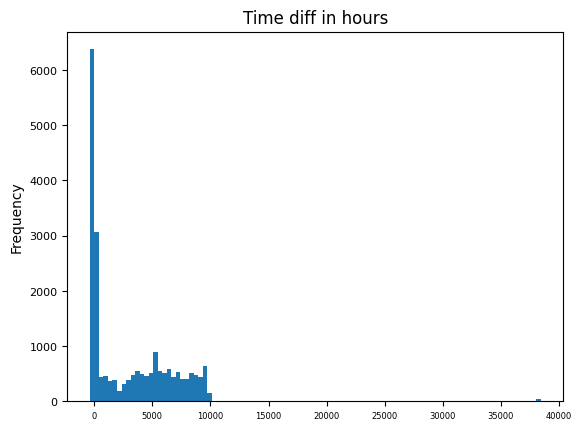

In [ ]:
merged['diff'].plot.hist(bins=100, title='Time diff in hours')

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

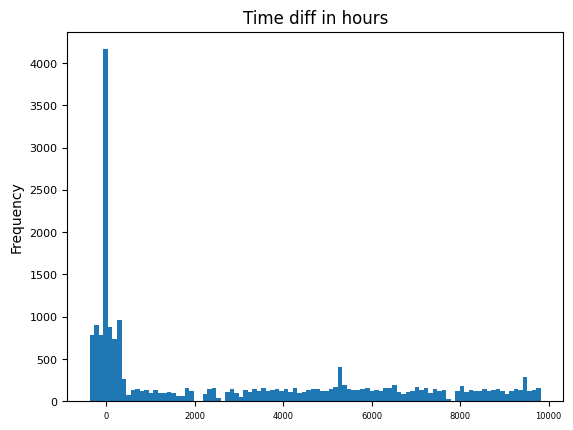

In [ ]:
merged_filtered = merged[merged['diff'] <= 10_000]
merged_filtered['diff'].plot.hist(bins=100, title='Time diff in hours')

In [ ]:
merged_filtered['diff'].count()

20956

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

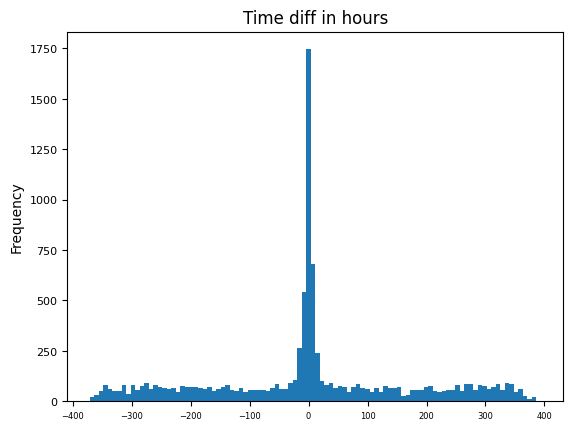

In [ ]:
merged_filtered = merged[merged['diff'] <= 400]
merged_filtered['diff'].plot.hist(bins=100, title='Time diff in hours')

Вывод: Половине записей в таблице neo соответствует запись в egtm в окне +/- 400 часов

In [ ]:
merged_filtered['diff'].count()

9432

### Эксперименты с частотой TAKEOFF

**TODO:**

1. Построить таблицу в рамках одного дня и построить количество данных слева и справа 
2. Отдельно для report name == TAKEOFF 
3. Сравнить частоту записей в рамках одного дня

In [ ]:
egtm_line = egtm[
    (egtm['RECORDED_DT'].dt.year == 2019) & 
    (egtm['RECORDED_DT'].dt.month == 5)
].index
egtm.index

DatetimeIndex(['2018-01-06 22:12:00', '2018-01-07 08:26:00',
               '2018-01-07 13:56:00', '2018-01-07 19:40:00',
               '2018-01-08 03:01:00', '2018-01-08 08:41:00',
               '2018-01-08 14:11:00', '2018-01-08 19:45:00',
               '2018-01-09 05:11:00', '2018-01-09 10:39:00',
               ...
               '2020-08-01 16:16:00', '2020-09-01 07:59:00',
               '2020-09-01 16:49:00', '2020-10-01 04:01:00',
               '2020-10-01 07:36:00', '2020-11-01 05:46:00',
               '2020-11-01 21:33:00', '2020-12-01 00:02:00',
               '2020-12-01 05:05:00', '2020-12-01 13:11:00'],
              dtype='datetime64[ns]', name='reportts', length=1284, freq=None)

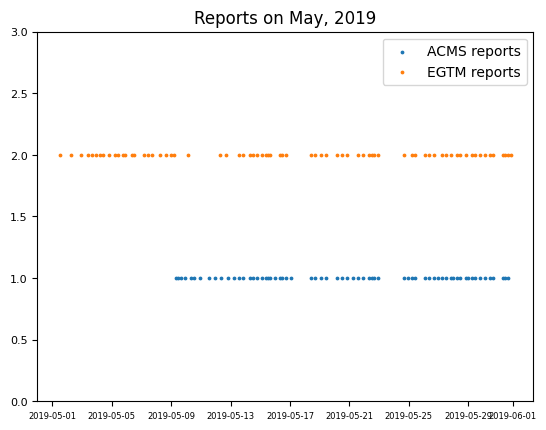

In [ ]:
acms_line = neo[
    (pd.to_datetime(neo.index).year == 2019) & 
    (pd.to_datetime(neo.index).month == 5) & 
    (neo['reportname'] == 'A320 ENGINE TAKE OFF REPORT')
].index

egtm_line = egtm[
    (egtm['RECORDED_DT'].dt.year == 2019) & 
    (egtm['RECORDED_DT'].dt.month == 5)
].index

fig, ax = plt.subplots()

ax.scatter(acms_line, y=acms_line.map(lambda _ : 1), s=3)
ax.scatter(egtm_line, y=egtm_line.map(lambda _: 2), s=3)
ax.legend(["ACMS reports", "EGTM reports"])
ax.set_ylim([0, 3])
ax.set_title("Reports on May, 2019")
plt.show()

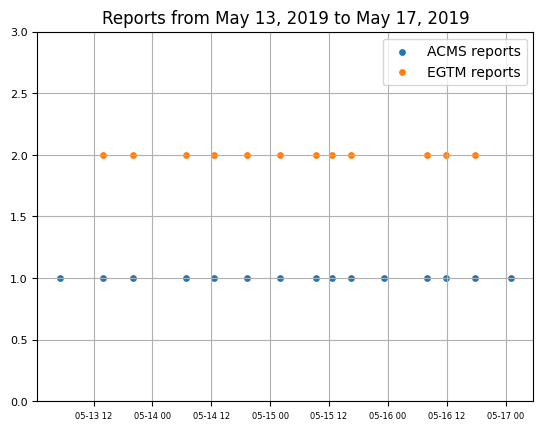

In [ ]:
acms_line = neo[
    (pd.to_datetime(neo.index).year == 2019) & 
    (pd.to_datetime(neo.index).month == 5) & 
    (pd.to_datetime(neo.index).day >= 13) & 
    (pd.to_datetime(neo.index).day <= 17) & 
    (neo['reportname'] == 'A320 ENGINE TAKE OFF REPORT')
].index

egtm_line = egtm[
    (egtm['RECORDED_DT'].dt.year == 2019) & 
    (egtm['RECORDED_DT'].dt.month == 5) &
    (egtm['RECORDED_DT'].dt.day >= 13) & 
    (egtm['RECORDED_DT'].dt.day <= 17)
].index

fig, ax = plt.subplots()

ax.scatter(acms_line, y=acms_line.map(lambda _ : 1), s=15)
ax.scatter(egtm_line, y=egtm_line.map(lambda _: 2), s=15)
ax.legend(["ACMS reports", "EGTM reports"])
ax.set_ylim([0, 3])
ax.set_title("Reports from May 13, 2019 to May 17, 2019")
ax.grid()
plt.show()

In [ ]:
pd.DataFrame([egtm_line, acms_line]).T

,0,1
0,2019-05-13 13:54:08,2019-05-13 05:08:27
1,2019-05-13 20:05:47,2019-05-13 13:54:06
2,2019-05-14 06:49:35,2019-05-13 20:05:45
3,2019-05-14 12:34:03,2019-05-14 06:49:32
4,2019-05-14 19:22:36,2019-05-14 12:34:02
5,2019-05-15 02:00:53,2019-05-14 19:22:35
6,2019-05-15 09:15:34,2019-05-15 02:00:13
7,2019-05-15 12:39:20,2019-05-15 09:15:31
8,2019-05-15 16:30:06,2019-05-15 12:39:12
9,2019-05-16 08:01:00,2019-05-15 16:30:05


1. Строить по одной модели на каждый признак 
1. Более поздние на тест 
1. Модели: XGBoost, LinReg, RandomForest
1. Составить таблицу с результатами
1. Вначале взять только Takeoff
1. Затем попробовать Cruise
1. Метрика rmse 
1. Время не является признаком (только числовые фичи)
1. Самый важный EGTMARGIN

Подготовить функции для построения графиков predict/target

Заказчик Шманатов

Проблемы автокореляции? 